In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

In [7]:
#Load data
df = pd.read_csv(os.path.abspath("../data/normalized_labeled_training_data.csv"))

#Select all columns except the last
X = df.iloc[:, :-1]

#Select label column 
y = df['increase_stock']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


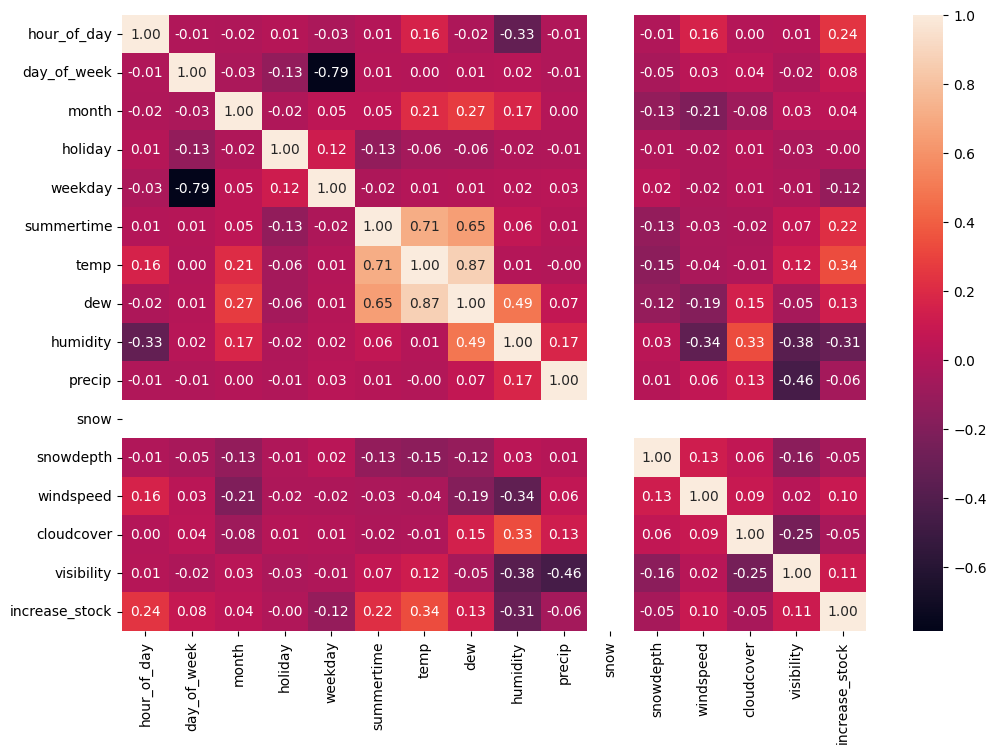

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [11]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'